In [ ]:
Это самая обычная Солнечная Система, где каждое тело притягивает все другие.
Движется и Солнце, и каждая планета, сила ~ 1/R^2
Т.е. численное и приблизительное решение задачи N тел:
Чтобы разглядеть орбиты первых 3-х планет лучше выставить N=4 и уменьшить Т и dT!

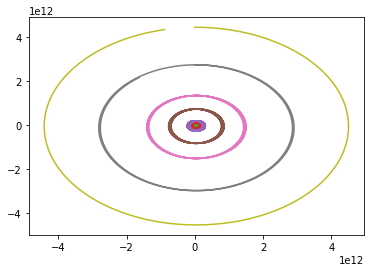

In [280]:
%matplotlib inline

import numpy
import numpy.linalg
import matplotlib.pyplot as plt

G = 0.0000000000667  
collision_distance = 10  
model_delta_t = 100000
time_to_model = 5000000000

class MaterialPoint:
    
    def __init__(self, mass: 'float', position: 'numpy.array', velocity: 'numpy.array'):
        self.mass = mass
        self.position = position
        self.velocity = velocity
    
    @staticmethod
    def gravity_dencity(dist: 'float')-> 'float':
        if dist > collision_distance:
            return G / dist **2
        else:
            return -G / dist ** 3
    
    def force_induced_by_other(self, other: 'MaterialPoint')-> 'numpy.array':
        delta_p = other.position - self.position
        distance = numpy.linalg.norm(delta_p)  
        force_direction = delta_p / distance
        
        force = force_direction * self.mass * other.mass * self.gravity_dencity(distance)
        return force
    
    def advance(self):
        self.position += self.velocity * model_delta_t

    def apply_force(self, force: 'numpy.array'):
        self.velocity += force * model_delta_t / self.mass


Sun = MaterialPoint(1.9885*10**30, numpy.array([0.0, 0.0]), numpy.array([0.0, 0.0]))
Merc = MaterialPoint(3.33*10**23, numpy.array([0.0, 45.9*10**9]), numpy.array([56600.0, 0.0]))
Ven = MaterialPoint(4.8675*10**24, numpy.array([0.0, 107.48*10**9]), numpy.array([35020.0, 0.0]))
Earth = MaterialPoint(5.9726*10**24, numpy.array([0.0, 147.098*10**9]), numpy.array([30270.0, 0.0]))
Mars = MaterialPoint(6.4171*10**23, numpy.array([0.0, 2.067*10**11]), numpy.array([26500.0, 0.0]))
Jup = MaterialPoint(1.8986*10**27, numpy.array([0.0, 7.406*10**11]), numpy.array([13720.0, 0.0]))
Sat = MaterialPoint(5.6846*10**26, numpy.array([0.0, 1.353*10**12]), numpy.array([10180.0, 0.0]))
Ur = MaterialPoint(86.813*10**24, numpy.array([0.0, 2.748*10**12]), numpy.array([7100.0, 0.0]))
Nep = MaterialPoint(102.413*10**24, numpy.array([0.0, 4.452*10**12]), numpy.array([5500.0, 0.0]))
Obj = [Sun, Merc, Ven, Earth, Mars, Jup, Sat, Ur, Nep]
N=9
def model_step():
    for i in range(N):
        for j in range(N):
            if j!=i:
                Obj[i].apply_force(Obj[i].force_induced_by_other(Obj[j]))
    for i in range(N):
        Obj[i].advance()

    

X = []
Y = []
for i in range(N):
    X.append([])
    Y.append([])

for stepn in range(int(time_to_model / model_delta_t)):
    for i in range(N):
        X[i].append(Obj[i].position[0])
        Y[i].append(Obj[i].position[1])
    model_step()


for i in range(N):
    plt.plot(X[i],Y[i])

plt.show()

In [ ]:
Теперь для удобства вернемся к исходным параметрам(G = 50, тела - из условия задачи) и понаблюдаем за 3-мя телами с близкого расстояния.
Сила притяжения теперь обратно пропорциональна R, тела друг к другу не притягиваются.

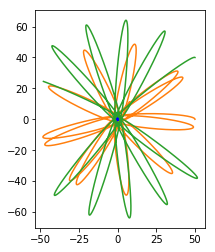

In [277]:
%matplotlib inline

import numpy
import numpy.linalg
import matplotlib.pyplot as plt

G = 50.0  
collision_distance = 3.0  
model_delta_t = 0.0001
time_to_model = 10

class MaterialPoint:
    """Материальная точка, движущаяся по двумерной плоскости"""
    
    def __init__(self, mass: 'float', position: 'numpy.array', velocity: 'numpy.array'):
        
        self.mass = mass
        self.position = position
        self.velocity = velocity
    
    @staticmethod
    def gravity_dencity(dist: 'float')-> 'float':
        if dist > collision_distance:
            return G / dist
        else:
            return -G / dist ** 3 
    
    def force_induced_by_other(self, other: 'MaterialPoint')-> 'numpy.array':
        delta_p = other.position - self.position
        distance = numpy.linalg.norm(delta_p)  
        force_direction = delta_p / distance
        force = force_direction * self.mass * other.mass * self.gravity_dencity(distance)
        return force
    
    def advance(self):
        # print(self.position)
        self.position += self.velocity * model_delta_t

    def apply_force(self, force: 'numpy.array'):
        # print(force)
        self.velocity += force * model_delta_t / self.mass


centrum = MaterialPoint(500.0, numpy.array([0.0, 0.0]), numpy.array([0.0, 0.0]))
point_1 = MaterialPoint(10.0, numpy.array([50.0, 0.0]), numpy.array([0.0, 15.0]))
point_2 = MaterialPoint(10.0, numpy.array([50.0, 40.0]), numpy.array([-7.0, 7.0]))
Obj = [centrum, point_1, point_2]
N=3
def model_step():
    for i in range(1,N):
        Obj[i].apply_force(Obj[i].force_induced_by_other(Obj[0]))
        Obj[i].advance()

X = []
Y = []
for i in range(N):
    X.append([])
    Y.append([])

for stepn in range(int(time_to_model / model_delta_t)):
    for i in range(N):
        X[i].append(Obj[i].position[0])
        Y[i].append(Obj[i].position[1])
    model_step()
c = plt.Circle((0, 0), 2, color='b')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect('equal')
ax.add_patch(c)



for i in range(N):
    plt.plot(X[i],Y[i])

plt.show()

In [ ]:
Вот, что получится, если сила притяжения к центру будет обратно пропорциональна R.